### MNIST 예제

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost=0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
        total_cost += cost_val
        
    print('Epoch : ', '%04d' %(epoch+1), 'Avg. cost = ', '{:.3f}'.format(total_cost/total_batch))
    
print('최적화 완료')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 : ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

C:\Users\Affinity\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
W0716 16:13:11.864975  2096 deprecation.py:323] From <ipython-input-1-d02da00674ab>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0716 16:13:11.864975  2096 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0716 16:13:11.866024  2096 deprecation.py:323] From C

Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0716 16:13:12.081084  2096 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0716 16:13:12.091474  2096 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0716 16:13:12.141438  2096 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a fu

Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch :  0001 Avg. cost =  0.404
Epoch :  0002 Avg. cost =  0.150
Epoch :  0003 Avg. cost =  0.099
Epoch :  0004 Avg. cost =  0.070
Epoch :  0005 Avg. cost =  0.054
Epoch :  0006 Avg. cost =  0.041
Epoch :  0007 Avg. cost =  0.033
Epoch :  0008 Avg. cost =  0.024
Epoch :  0009 Avg. cost =  0.022
Epoch :  0010 Avg. cost =  0.019
Epoch :  0011 Avg. cost =  0.015
Epoch :  0012 Avg. cost =  0.013
Epoch :  0013 Avg. cost =  0.015
Epoch :  0014 Avg. cost =  0.012
Epoch :  0015 Avg. cost =  0.009
최적화 완료
정확도 :  0.9808


### MNIST 예제 2

Extracting ./mnist/data\train-images-idx3-ubyte.gz
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz
Epoch :  0001 Avg. cost =  0.411
Epoch :  0002 Avg. cost =  0.155
Epoch :  0003 Avg. cost =  0.099
Epoch :  0004 Avg. cost =  0.072
Epoch :  0005 Avg. cost =  0.053
Epoch :  0006 Avg. cost =  0.041
Epoch :  0007 Avg. cost =  0.031
Epoch :  0008 Avg. cost =  0.025
Epoch :  0009 Avg. cost =  0.020
Epoch :  0010 Avg. cost =  0.019
Epoch :  0011 Avg. cost =  0.015
Epoch :  0012 Avg. cost =  0.016
Epoch :  0013 Avg. cost =  0.009
Epoch :  0014 Avg. cost =  0.012
Epoch :  0015 Avg. cost =  0.012
최적화 완료


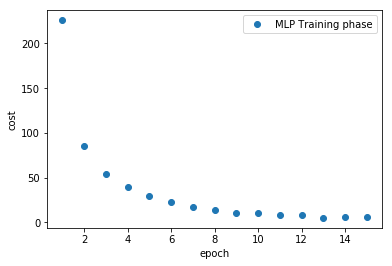

In [4]:
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./mnist/data', one_hot=True)
display_step=1

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
avg_set = []
epoch_set = []

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs, Y:batch_ys})
        total_cost += cost_val
        
    print('Epoch : ', '%04d' %(epoch+1), 'Avg. cost = ', '{:.3f}'.format(total_cost/total_batch))
    

    avg_set.append(total_cost)
    epoch_set.append(epoch+1)

print('최적화 완료')

plt.plot(epoch_set, avg_set, 'o', label='MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend()
plt.show()
        

In [ ]:
mnist = input_data.read_data_sets('./mnist/data', one_hot=True)
display_step=1

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
avg_set = []
epoch_set = []

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs, Y:batch_ys})
        total_cost += cost_val
        
    print('Epoch : ', '%04d' %(epoch+1), 'Avg. cost = ', '{:.3f}'.format(total_cost/total_batch))
    

    avg_set.append(total_cost)
    epoch_set.append(epoch+1)

print('최적화 완료')

plt.plot(epoch_set, avg_set, 'o', label='MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend()
plt.show()